# Intro to TensorFlow

### 0.1 installation of tensorflow

In [1]:
!pip install tensorflow

  Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.18.0-cp312-cp312-win_amd64.whl.metadata (4.9 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-5.28.3-cp310-abi3-win_amd64.whl.metadata (592 bytes)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
  Using cached wrapt-1.16.0-cp312-cp312-win_amd64.whl.metadata (6.8 kB)
  Using cached grpcio-1.67.1-cp312-cp312-win_amd64.whl.metadat


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
!pip install matplotlib


   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---- ----------------------------------- 0.8/7.8 MB 5.6 MB/s eta 0:00:02
   --------- ------------------------------ 1.8/7.8 MB 4.0 MB/s eta 0:00:02
   -------------- ------------------------- 2.9/7.8 MB 4.2 MB/s eta 0:00:02
   ------------------ --------------------- 3.7/7.8 MB 4.0 MB/s eta 0:00:02
   ---------------------- ----------------- 4.5/7.8 MB 4.1 MB/s eta 0:00:01
   -------------------------- ------------- 5.2/7.8 MB 4.0 MB/s eta 0:00:01
   ------------------------------ --------- 6.0/7.8 MB 4.0 MB/s eta 0:00:01
   ---------------------------------- ----- 6.8/7.8 MB 4.0 MB/s eta 0:00:01
   -------------------------------------- - 7.6/7.8 MB 4.0 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 3.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   -------------- ------------------------- 0.8/2.2 MB 4.2 MB/s eta 0:00:01
   -----------------------


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import tensorflow as tf
!pip install mitdeeplearning --quiet
# import mitdeeplearning as mdl

import numpy as np
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### 1.1 Why Tensorflow is called TensorFlow?

TensorFlow is called 'TensorFlow' because it handles the flow (node/mathematical operation) of Tensors, which are data structures that you can think of as multi-dimensional arrays. Tensors are represented as n-dimensional arrays of base dataypes such as a string or integer -- they provide a way to generalize vectors and matrices to higher dimensions.

The shape of a Tensor defines its number of dimensions and the size of each dimension. The rank of a Tensor provides the number of dimensions (n-dimensions) -- you can also think of this as the Tensor's order or degree.

Let's first look at 0-d Tensors, of which a scalar is an example:

In [10]:
sport = tf.constant("Tennis",tf.string)
number = tf.constant(1.4142135637,tf.float64)
print("`sport` is a {}-d Tensor".format(tf.rank(sport).numpy()))
print("`number` is a {}-d Tensor".format(tf.rank(number).numpy()))

`sport` is a 0-d Tensor
`number` is a 0-d Tensor


Vectors and lists can be used to create 1-d Tensors:

In [12]:
sports = tf.constant(["Tennis" , "Basketball"],tf.string)
numbers= tf.constant([3.14134,3.321344,2.128759],tf.float64)

print("`sports` is a {}-d Tensor and shape is {}".format(tf.rank(sports).numpy() , tf.shape(sports)))
print("`numbers` is a {}-d tensor and the shape is {}".format(tf.rank(numbers).numpy() , tf.shape(numbers)))

`sports` is a 1-d Tensor and shape is [2]
`numbers` is a 1-d tensor and the shape is [3]


Now next, we consider our 2-d and higher rank matrices

In [16]:
matrix = [[1,2,3,2],[4,5,6,4],[7,8,9,7]]
matrix = tf.convert_to_tensor(matrix)  # Convert matrix to a TensorFlow tensor

assert isinstance(matrix, tf.Tensor), "matrix must be a tf Tensor object"
assert tf.rank(matrix).numpy() == 2

4 D -

In [18]:
images = tf.zeros([10,256,256,7])
images = tf.convert_to_tensor(images)
assert isinstance(images, tf.Tensor), "matrix must be a tf Tensor object"
assert tf.rank(images).numpy() == 4, "matrix must be of rank 4"
assert tf.shape(images).numpy().tolist() == [10, 256, 256, 7], "matrix is incorrect shape"


In [19]:
row_vector = matrix[1]
column_vector = matrix[:,1]
scalar = matrix[0, 1]

print("`row_vector`: {}".format(row_vector.numpy()))
print("`column_vector`: {}".format(column_vector.numpy()))
print("`scalar`: {}".format(scalar.numpy()))


`row_vector`: [4 5 6 4]
`column_vector`: [2 5 8]
`scalar`: 2


### 1.2 Computations on Tensors!

In [21]:
a = tf.constant(5)
b=tf.constant(6)
c1 = tf.add(a,b)
c2 = a+b
print(c1)
print(c2)

tf.Tensor(11, shape=(), dtype=int32)
tf.Tensor(11, shape=(), dtype=int32)


In [22]:
def func(a,b):
    c=tf.add(a,b)
    d=tf.multiply(a,b)
    e=tf.divide(d,c)
    return e

In [23]:
a=5
b=10
print(func(a,b))

tf.Tensor(3.3333333333333335, shape=(), dtype=float64)


Notice how our output is a Tensor with value defined by the output of the computation, and that the output has no shape as it is a single scalar value.



### 1.3 Neural Networks in Tensorflow

In [26]:
import tensorflow as tf

class OurDenseLayer(tf.keras.layers.Layer):
    def __init__(self, n_output_nodes):
        super(OurDenseLayer, self).__init__()
        self.n_output_nodes = n_output_nodes

    def build(self, input_shape):
        d = int(input_shape[-1])
        # Define and initialize parameters: a weight matrix W and bias b
        self.W = self.add_weight(name="weight", shape=(d, self.n_output_nodes))  # Weight matrix shape
        self.b = self.add_weight(name="bias", shape=(self.n_output_nodes,))       # Bias shape

    def call(self, x):
        # Matrix multiplication and adding the bias
        z = tf.matmul(x, self.W) + self.b
        # Applying the sigmoid activation function
        y = tf.sigmoid(z)
        return y

# Set random seed for reproducibility
tf.keras.utils.set_random_seed(1)

# Create an instance of OurDenseLayer and build it
layer = OurDenseLayer(3)
layer.build((1, 2))

# Define an input tensor
x_input = tf.constant([[1, 2.]], shape=(1, 2))

# Call the layer on the input tensor
y = layer.call(x_input)

# Output the result
print(y.numpy())

# Test output with your custom test function
# mdl.lab1.test_custom_dense_layer_output(y)
   

[[0.2626233  0.18934216 0.46882924]]


In [34]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
n_output_nodes = 3
model = Sequential()
dense_layer = Dense(units=n_output_nodes, input_shape=(2,))
model.add(dense_layer)

In [39]:
x_in = tf.constant([[100,200]],shape=(1,2))
print(model(x_in))

tf.Tensor([[ 30.096622  48.20173  201.3427  ]], shape=(1, 3), dtype=float32)


Let's define the same neural network as above now using Subclassing rather than the Sequential model.

In [35]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense
class SubclassModel(tf.keras.Model):
    def __init__(self,n_output_nodes):
        super(SubclassModel , self).__init__()
        self.dense_layer = Dense(units=n_output_nodes,activation='sigmoid')
    def call(self,inputs):
        return self.dense_layer(inputs)


In [38]:
n_output_nodes = 3
model1 = SubclassModel(n_output_nodes)
print(model1(x_in))

tf.Tensor([[1.0028554e-34 0.0000000e+00 0.0000000e+00]], shape=(1, 3), dtype=float32)


 Defining a model using subclassing and specifying custom behavior

In [43]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense
class IdentifyModel(tf.keras.Model):
    def __init__(self,n_output_nodes):
        super(IdentifyModel, self).__init__()
        self.dense_layer = tf.keras.layers.Dense(n_output_nodes, activation='sigmoid')
    def call(self, inputs, isidentity=False):
        if isidentity:
            return inputs  # Return the input unchanged if isidentity is True
        else:
            return self.dense_layer(inputs)  # Apply the dense layer if isidentity is False


In [44]:
n_output_nodes = 3
model = IdentifyModel(n_output_nodes)

x_input = tf.constant([[100, 200]], shape=(1, 2))

model_output_identity = model(x_input, isidentity=True)
print("Model Output with Identity (Input unchanged):", model_output_identity.numpy())

model_output_non_identity = model(x_input, isidentity=False)
print("Model Output with Dense Layer (Sigmoid applied):", model_output_non_identity.numpy())


Model Output with Identity (Input unchanged): [[100 200]]
Model Output with Dense Layer (Sigmoid applied): [[1.0000000e+00 2.1300945e-19 4.9300073e-38]]


C:\Users\parde\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\layer.py:391: UserWarning: `build()` was called on layer 'identify_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


In [47]:
x = tf.Variable(3.0)

# Initiate the gradient tape
with tf.GradientTape() as tape:
  # Define the function
  y = x * x
# Access the gradient -- derivative of y with respect to x
dy_dx = tape.gradient(y, x)

assert dy_dx.numpy() == 6.0
     


initializing x=[[-0.45701224]]


Text(0, 0.5, 'x value')

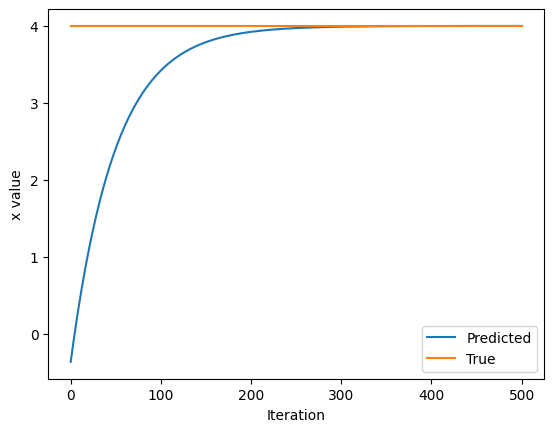

In [50]:
x = tf.Variable([tf.random.normal([1])])
print("initializing x={}".format(x.numpy()))

learning_rate = 1e-2
history = []

x_f=4 

for i in range(500):
    with tf.GradientTape() as tape:
        loss=tf.square(x-x_f)
    grad = tape.gradient(loss,x)
    new_x = x - learning_rate * grad
    x.assign(new_x)
    history.append(x.numpy()[0])
plt.plot(history)
plt.plot([0, 500],[x_f,x_f])
plt.legend(('Predicted', 'True'))
plt.xlabel('Iteration')
plt.ylabel('x value')
